In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("C:/Users/pravalika goud k/Downloads/credit_card_transactions.csv")

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


# Data cleaning

In [6]:
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [7]:
df['merch_zipcode']=df['merch_zipcode'].fillna('Unknown')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
df['dob']=pd.to_datetime(df['dob'],errors='coerce')
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'],errors='coerce')

In [10]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [11]:
df.rename(columns={'Unnamed: 0':'S.No',
                      'trans_date_trans_time':'transaction_datetime',
                      'cc_num':'credit_card_num',
                      'amt':'amount',
                      'first':'first_name',
                      'last':'last_name',
                      'lat':'latitude',
                     'long':'longitude',
                     'city_pop':'city_population',
                     'trans_num':'transaction_num'},inplace=True)

In [12]:
df.columns

Index(['S.No', 'transaction_datetime', 'credit_card_num', 'merchant',
       'category', 'amount', 'first_name', 'last_name', 'gender', 'street',
       'city', 'state', 'zip', 'latitude', 'longitude', 'city_population',
       'job', 'dob', 'transaction_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'merch_zipcode'],
      dtype='object')

In [13]:
from datetime import datetime
today=pd.to_datetime(datetime.today())
df['age']=(today-df['dob']).dt.days//365

In [14]:
df.drop(columns=['dob','gender','first_name','last_name','job','unix_time'],inplace=True,axis=1)

In [15]:
df.columns

Index(['S.No', 'transaction_datetime', 'credit_card_num', 'merchant',
       'category', 'amount', 'street', 'city', 'state', 'zip', 'latitude',
       'longitude', 'city_population', 'transaction_num', 'merch_lat',
       'merch_long', 'is_fraud', 'merch_zipcode', 'age'],
      dtype='object')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.describe()

,S.No,transaction_datetime,credit_card_num,amount,zip,latitude,longitude,city_population,merch_lat,merch_long,is_fraud,age
count,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,2019-10-03 12:47:28.070214144,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03,5.086184e+01
min,0.000000e+00,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00,2.000000e+01
25%,3.241685e+05,2019-06-03 19:12:22.500000,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00,3.700000e+01
50%,6.483370e+05,2019-10-03 07:35:47,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00,4.900000e+01
75%,9.725055e+05,2020-01-28 15:02:55.500000,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00,6.200000e+01
max,1.296674e+06,2020-06-21 12:13:37,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00,1.000000e+02
std,3.743180e+05,NaN,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02,1.740219e+01


In [18]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [19]:
df_fraud=df[df['is_fraud']==1]

In [20]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 2449 to 1295733
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   S.No                  7506 non-null   int64         
 1   transaction_datetime  7506 non-null   datetime64[ns]
 2   credit_card_num       7506 non-null   int64         
 3   merchant              7506 non-null   object        
 4   category              7506 non-null   object        
 5   amount                7506 non-null   float64       
 6   street                7506 non-null   object        
 7   city                  7506 non-null   object        
 8   state                 7506 non-null   object        
 9   zip                   7506 non-null   int64         
 10  latitude              7506 non-null   float64       
 11  longitude             7506 non-null   float64       
 12  city_population       7506 non-null   int64         
 13  transaction_num  

In [22]:
df.to_csv('C:/Users/pravalika goud k/OneDrive/Desktop/projects/CREDIT CARD FRAUD/credit_card_fraud_transactions_cleaned1.csv',index=False)

# Exploratory Data analysis(EDA)

# Relationship Between Transaction Amount and Fraud

C:\Users\pravalika goud k\AppData\Local\Temp\ipykernel_14900\1906443553.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y='amount', data=df, palette="muted")


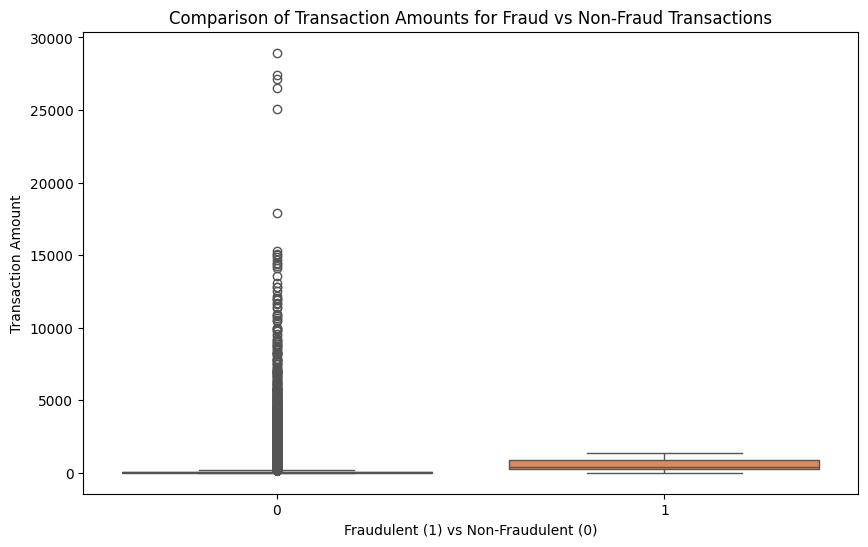

In [20]:
# Relationship Between Transaction Amount and Fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amount', data=df, palette="muted")
plt.title("Comparison of Transaction Amounts for Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraudulent (1) vs Non-Fraudulent (0)")
plt.ylabel("Transaction Amount")
plt.show()

# Plot Fraud Frequency by Category

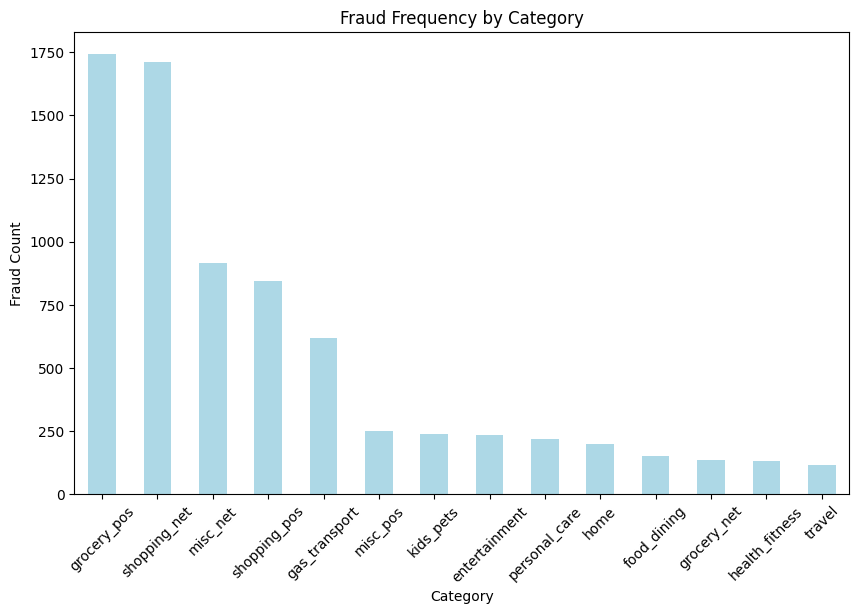

In [21]:
# Fraud by Category
fraud_by_category = df[df['is_fraud'] == 1].groupby('category').size().sort_values(ascending=False)

# Plot Fraud Frequency by Category
plt.figure(figsize=(10, 6))
fraud_by_category.plot(kind='bar', color='lightblue')
plt.title("Fraud Frequency by Category")
plt.xlabel("Category")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()


# Plot Fraud Frequency by Merchant

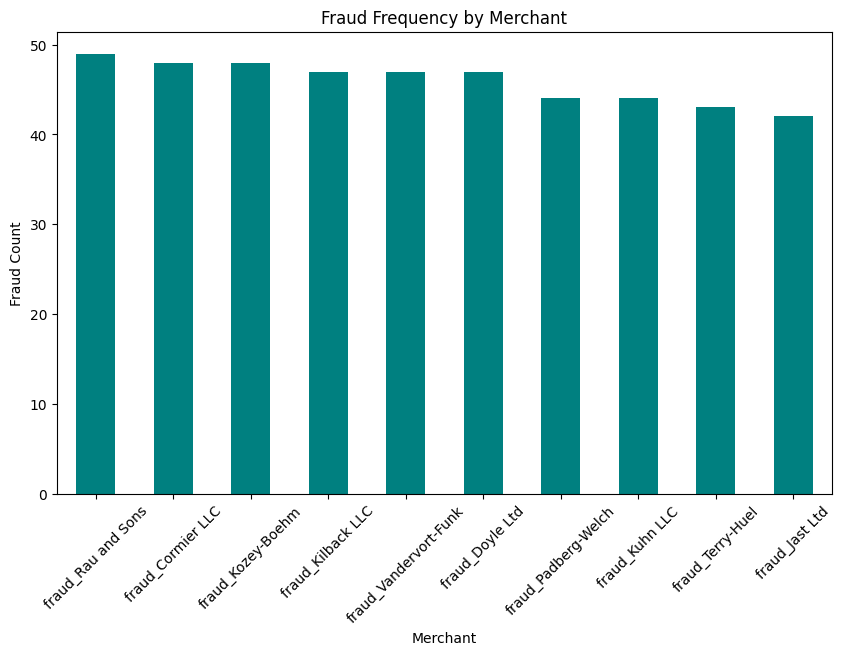

In [22]:
# Fraud by Merchant
fraud_by_merchant = df[df['is_fraud'] == 1].groupby('merchant').size().sort_values(ascending=False)

# Plot Fraud Frequency by Merchant
plt.figure(figsize=(10, 6))
fraud_by_merchant.head(10).plot(kind='bar', color='teal')  # Show top 10 merchants
plt.title("Fraud Frequency by Merchant")
plt.xlabel("Merchant")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()

#  Create a scatter plot for fraudulent and non-fraudulent transactions based on latitude and longitude

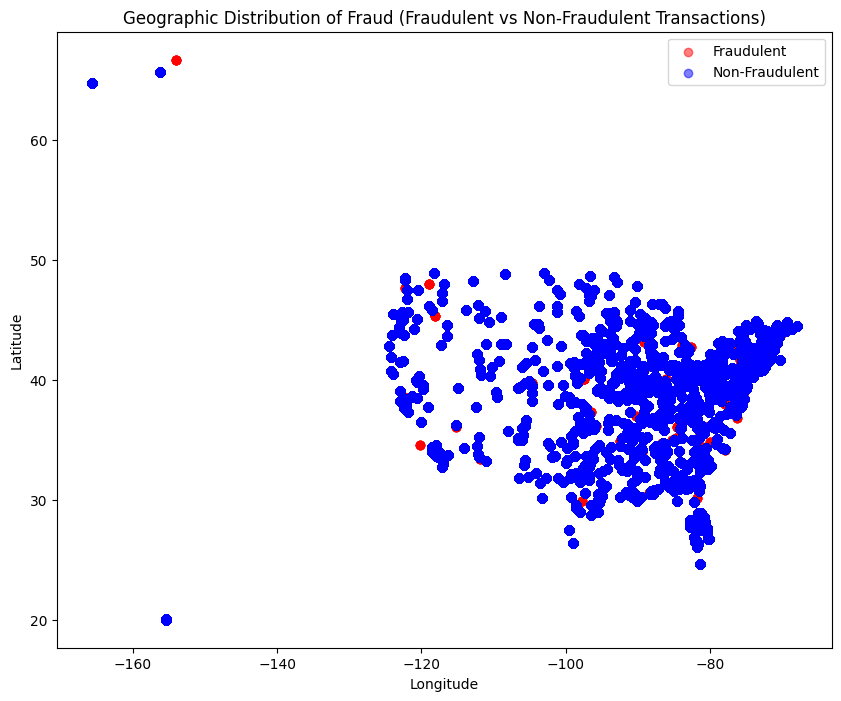

In [23]:
# Create a scatter plot for fraudulent transactions
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]
# latitude and longitude of the person who made transactions
plt.figure(figsize=(10, 8))

# Plot fraudulent transactions in red
plt.scatter(fraud_df['longitude'], fraud_df['latitude'], color='red', alpha=0.5, label='Fraudulent')

# Plot non-fraudulent transactions in blue
plt.scatter(non_fraud_df['longitude'], non_fraud_df['latitude'], color='blue', alpha=0.5, label='Non-Fraudulent')

plt.title('Geographic Distribution of Fraud (Fraudulent vs Non-Fraudulent Transactions)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


# Bar plot on fraud by agegroup


In [24]:
# Add simulated demographic data
np.random.seed(42)
df['age'] = np.random.randint(18, 70, size=len(df))  # Simulate ages between 18 and 70
df['gender'] = np.random.choice(['Male', 'Female'], size=len(df), p=[0.5, 0.5])  # Random gender



C:\Users\pravalika goud k\AppData\Local\Temp\ipykernel_14900\2966343640.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_age = df[df['is_fraud'] == 1].groupby('age_group').size()


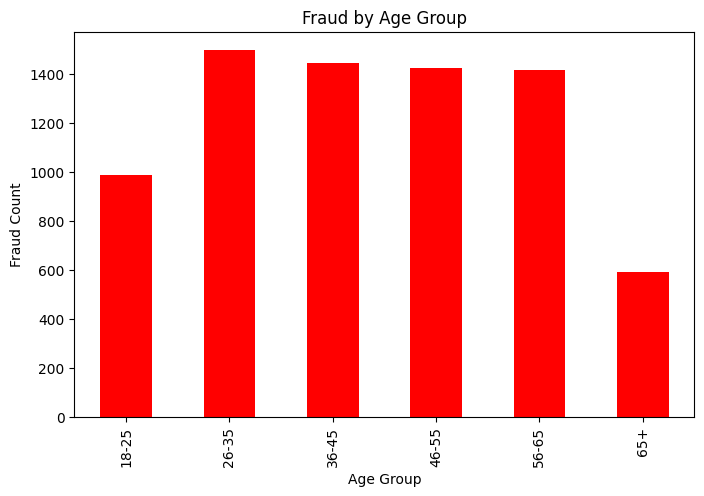

In [25]:
# Group age into bins
bins = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Fraud counts by age group
fraud_by_age = df[df['is_fraud'] == 1].groupby('age_group').size()

# Plot
import matplotlib.pyplot as plt

fraud_by_age.plot(kind='bar', color='red', figsize=(8, 5))
plt.title('Fraud by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Fraud Count')
plt.show()


# Pie chart on fraud by gender

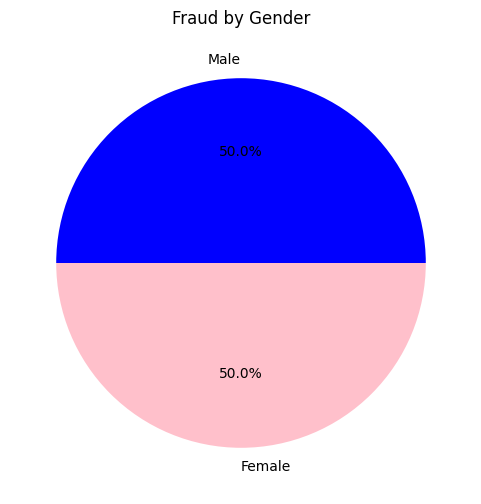

In [26]:
# Fraud by gender
fraud_by_gender = df[df['is_fraud'] == 1]['gender'].value_counts()

# Plot
fraud_by_gender.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'], figsize=(6, 6))
plt.title('Fraud by Gender')
plt.ylabel('')
plt.show()


# Correlation heatmap on ('age', 'amount', 'city_population', 'is_fraud')

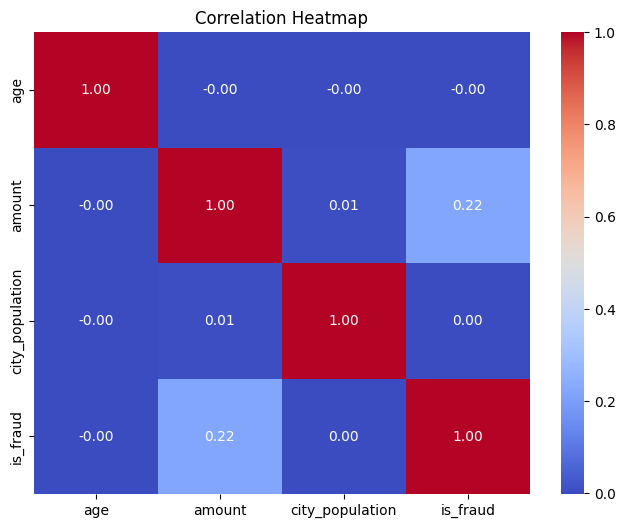

In [27]:
import seaborn as sns

# Select relevant numerical columns
num_cols = ['age', 'amount', 'city_population', 'is_fraud']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Geospatial mapping

In [28]:
# Filter fraudulent and non-fraudulent transactions
df_is_fraud = df[df['is_fraud'] == 1]  # Fraudulent transactions
df_non_fraud = df[df['is_fraud'] == 0]  # Non-fraudulent transactions

# Sample a fraction of the data (e.g., 10% for quicker plotting)
sampled_fraud_df = df_is_fraud.sample(frac=0.1, random_state=42)  # 10% fraud data
sampled_non_fraud_df = df_non_fraud.sample(frac=0.1, random_state=42)  # 10% non-fraud data

# Display the first few rows of the sampled data
print("Sampled Fraud Data:", sampled_fraud_df.head())
print("Sampled Non-Fraud Data:", sampled_non_fraud_df.head())


Sampled Fraud Data:           S.No transaction_datetime      credit_card_num  \
758837  758837  2019-11-20 22:18:56     4365382885912355   
981412  981412  2020-02-02 23:13:33      180048185037117   
799445  799445  2019-12-04 01:53:21  4102003771126577611   
112813  112813  2019-03-04 22:11:30     2657850734909997   
833901  833901  2019-12-11 22:37:25     3557442674264531   

                                          merchant      category  amount  \
758837         fraud_Kovacek, Dibbert and Ondricka   grocery_pos  312.51   
981412                            fraud_Bednar PLC     kids_pets   20.53   
799445                          fraud_Koepp-Parker   grocery_pos  264.10   
112813  fraud_Romaguera, Cruickshank and Greenholt  shopping_net  987.73   
833901                         fraud_Lemke-Gutmann  shopping_net  868.00   

                                 street        city state    zip  ...  \
758837        956 Paul Fields Suite 108         Orr    MN  55771  ...   
981412          

In [29]:
import folium

# Define the center of the map (mean latitude and longitude of the dataset)
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Plot fraudulent transactions
for idx, row in sampled_fraud_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.7,
        tooltip=f"Fraud - Merchant: {row['merchant']}, Amount: ${row['amount']}"
    ).add_to(m)

# Plot non-fraudulent transactions
for idx, row in sampled_non_fraud_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        tooltip=f"Non-Fraud - Merchant: {row['merchant']}, Amount: ${row['amount']}"
    ).add_to(m)

# Save the map to an HTML file
m.save("fraud_map.html")
print("Map has been saved as fraud_map.html. Open it in a browser to view.")



Map has been saved as fraud_map.html. Open it in a browser to view.


In [30]:
import webbrowser
webbrowser.open("fraud_map.html")

True

# Fraudulent transactions by merchant category

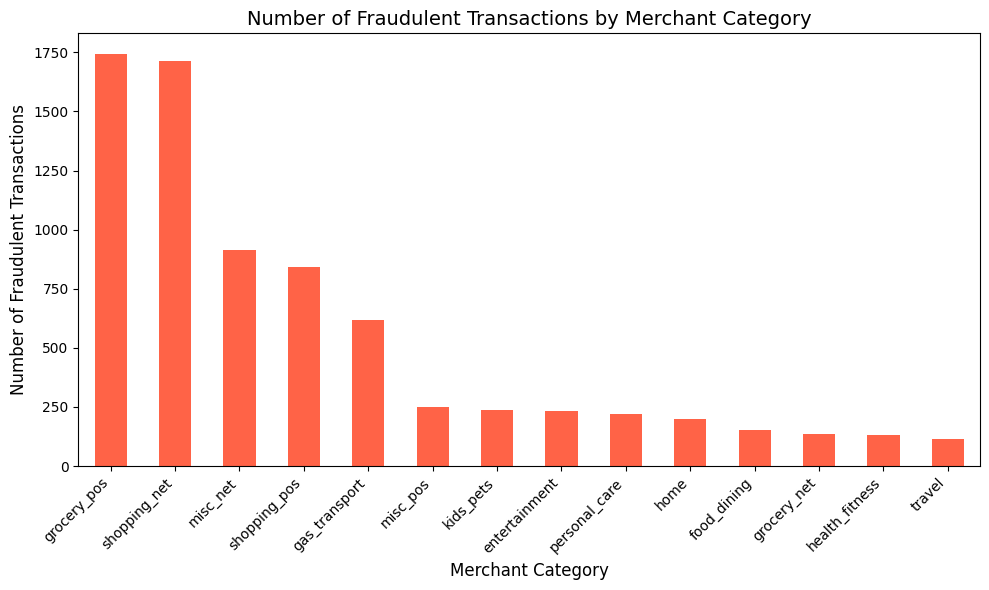

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by merchant category and count fraudulent transactions
fraud_by_category = df[df['is_fraud'] == 1].groupby('category').size().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
fraud_by_category.plot(kind='bar', color='tomato')
plt.title('Number of Fraudulent Transactions by Merchant Category', fontsize=14)
plt.xlabel('Merchant Category', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Z-Score Analysis for Outlier Detection

Number of outliers detected: 12738
is_fraud
0    9141
1    3597
Name: amount, dtype: int64


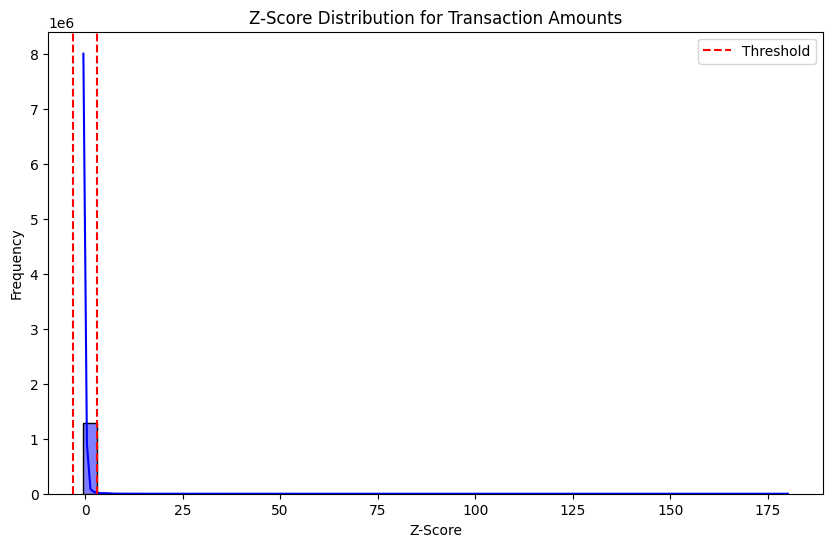

In [32]:
# Step 2: Z-Score Analysis for Outlier Detection
# Calculate the Z-Score for transaction amounts
df['z_score_amount'] = (df['amount'] - df['amount'].mean()) / df['amount'].std()

# Define a threshold for identifying outliers (e.g., Z > 3 or Z < -3)
outlier_threshold = 3
outliers = df[np.abs(df['z_score_amount']) > outlier_threshold]

# Correlate outliers with fraud status
print(f"Number of outliers detected: {len(outliers)}")
print(outliers.groupby('is_fraud')['amount'].count())  # Count fraud and non-fraud in outliers

# Visualize Z-Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['z_score_amount'], bins=50, kde=True, color='blue')
plt.axvline(outlier_threshold, color='red', linestyle='--', label='Threshold')
plt.axvline(-outlier_threshold, color='red', linestyle='--')
plt.title('Z-Score Distribution for Transaction Amounts')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Top 10 merchants with the most fraudulent transactions

C:\Users\pravalika goud k\AppData\Local\Temp\ipykernel_14900\268213052.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='Reds_r')


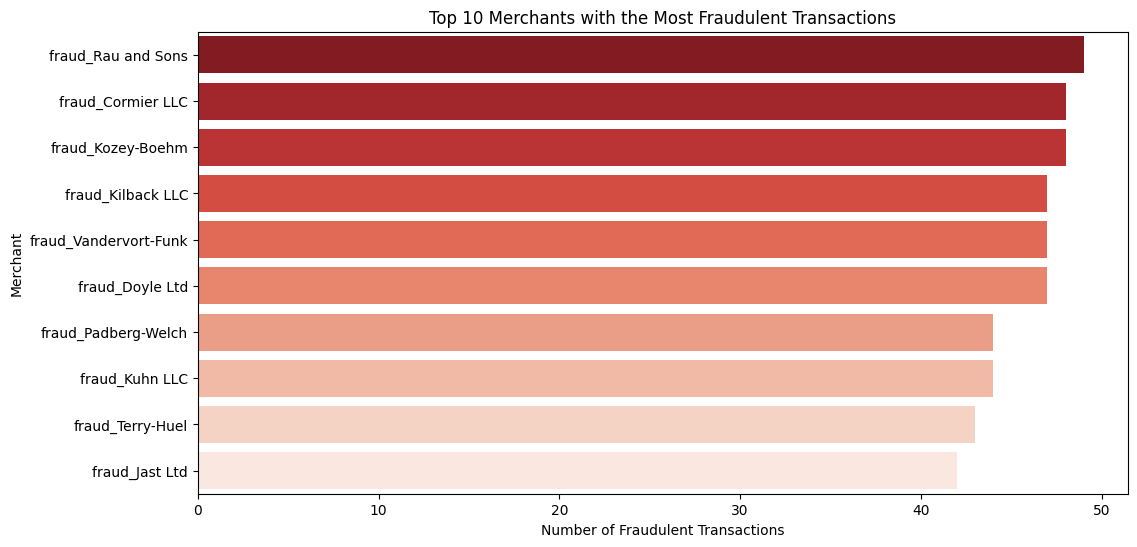

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count fraudulent transactions by merchant
fraud_by_merchant = df[df['is_fraud'] == 1].groupby('merchant').size().sort_values(ascending=False)

# Step 2: Plot the top merchants with the most fraudulent transactions
top_merchants = fraud_by_merchant.head(10)  # Top 10 merchants with the most frauds

plt.figure(figsize=(12, 6))
sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='Reds_r')
plt.title('Top 10 Merchants with the Most Fraudulent Transactions')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Merchant')
plt.show()


# Top 10  merchants with the most fraudulent transactions group by categories

C:\Users\pravalika goud k\AppData\Local\Temp\ipykernel_14900\1466199414.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='category', data=fraud_category_counts, palette="Reds_r")


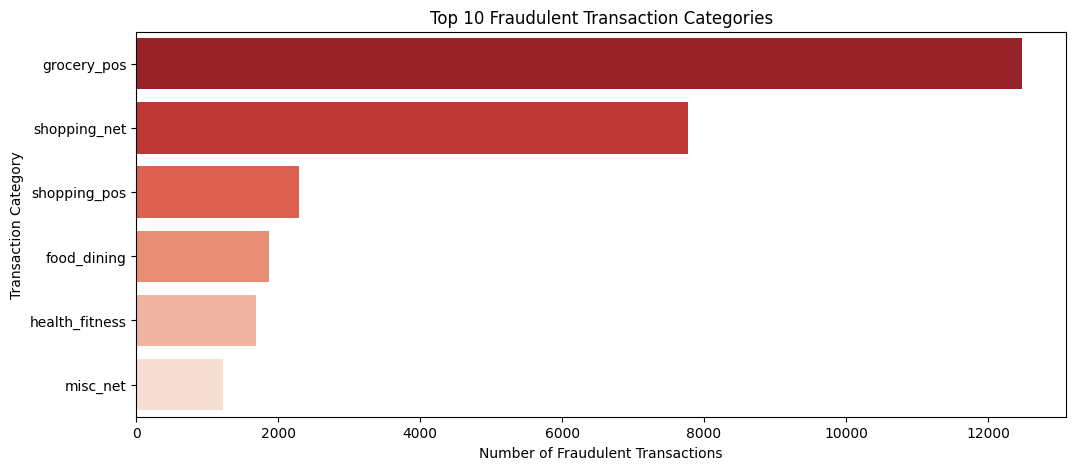

In [34]:
# List of top fraudulent merchants
top_fraud_merchants = [
    'fraud_Rau and Sons', 'fraud_Cormier LLC', 'fraud_Kozey-Boehm', 
    'fraud_Kilback LLC', 'fraud_Vandervort-Funk', 'fraud_Doyle Ltd', 
    'fraud_Padberg-Welch', 'fraud_Kuhn LLC', 'fraud_Terry-Huel', 'fraud_Jast Ltd'
]

# Filter for fraudulent merchants
fraud_merchants_df = df[df['merchant'].isin(top_fraud_merchants)]

# Count fraudulent transactions by category
fraud_category_counts = fraud_merchants_df.groupby('category').size().reset_index(name='count')

# Sort and plot top 10 categories
fraud_category_counts = fraud_category_counts.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x='count', y='category', data=fraud_category_counts, palette="Reds_r")
plt.title("Top 10 Fraudulent Transaction Categories")
plt.xlabel("Number of Fraudulent Transactions")
plt.ylabel("Transaction Category")
plt.show()


C:\Users\pravalika goud k\AppData\Local\Temp\ipykernel_14900\2010770378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_label', y='amount', data=df, ax=axes[0], palette=["blue", "red"])
C:\Users\pravalika goud k\AppData\Local\Temp\ipykernel_14900\2010770378.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_label', y='age', data=df, ax=axes[1], palette=["blue", "red"])


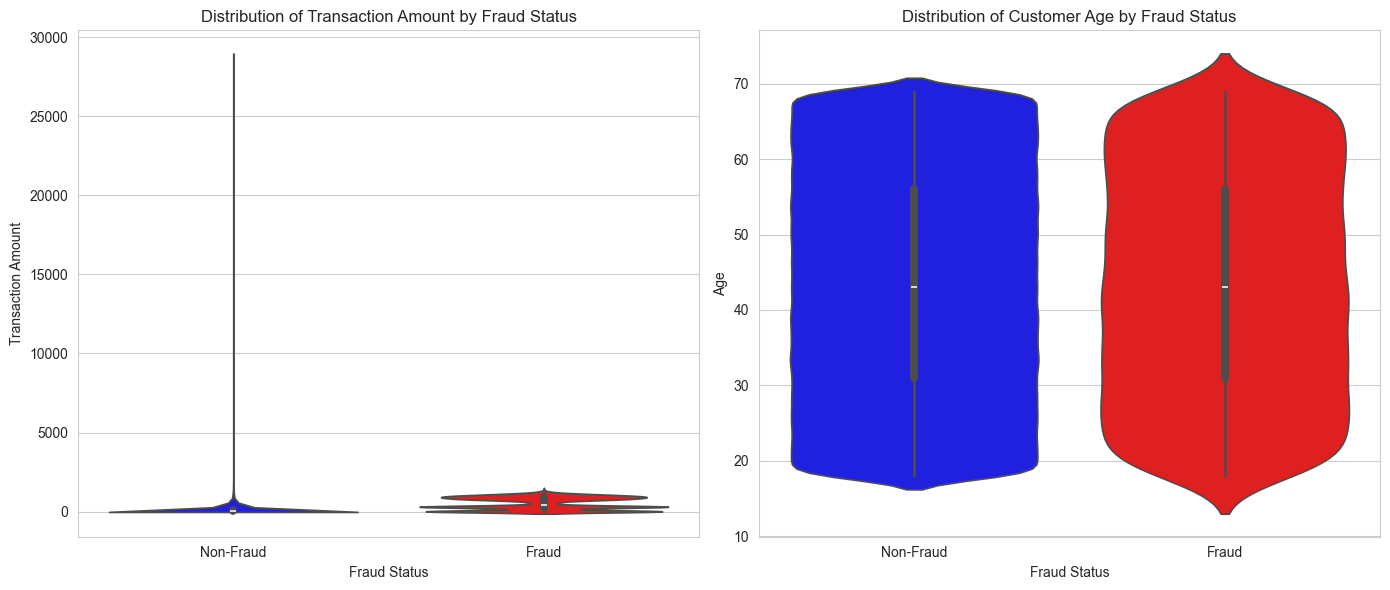

In [35]:
# Convert 'is_fraud' to categorical labels for better visualization
df['fraud_label'] = df['is_fraud'].map({0: 'Non-Fraud', 1: 'Fraud'})

# Set plot style
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Violin plot for transaction amount
sns.violinplot(x='fraud_label', y='amount', data=df, ax=axes[0], palette=["blue", "red"])
axes[0].set_title("Distribution of Transaction Amount by Fraud Status")
axes[0].set_ylabel("Transaction Amount")
axes[0].set_xlabel("Fraud Status")

# Violin plot for customer age
sns.violinplot(x='fraud_label', y='age', data=df, ax=axes[1], palette=["blue", "red"])
axes[1].set_title("Distribution of Customer Age by Fraud Status")
axes[1].set_ylabel("Age")
axes[1].set_xlabel("Fraud Status")

# Show plots
plt.tight_layout()
plt.show()


# Distribution of fraudulent transactions per customer

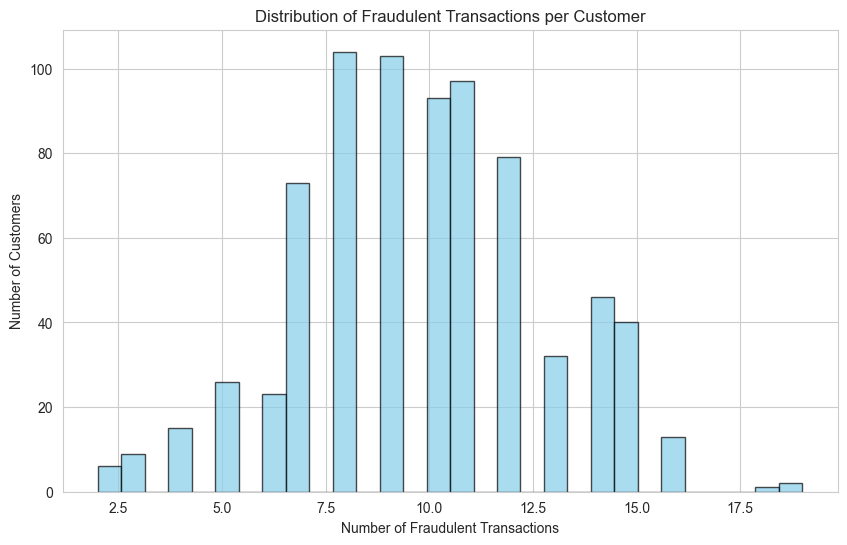

In [36]:
# Grouping by CC number and counting fraudulent transactions
fraud_counts = df[df['is_fraud'] == 1].groupby('credit_card_num').size()

# Plotting a bar chart or histogram
plt.figure(figsize=(10, 6))
fraud_counts.plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Distribution of Fraudulent Transactions per Customer')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Number of Customers')
plt.show()
